# Challenge 1

<font color="blue">
Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

<UL>
<LI> quadratic (second degree polynomial) </LI>
<LI> logarithmic (`log(x)`) </LI>
</UL>

(The second one should fit really well, since it has the same form as the underlying model!)
</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(444)

b0, b1 = 2., 2.

# x must be > 0 because log(x<=0) is undef.
x = np.abs(np.random.normal(loc=2, scale=5, size=40000))
y = b0 + b1 * np.log(x) + 0.5 * np.random.randn(x.size)

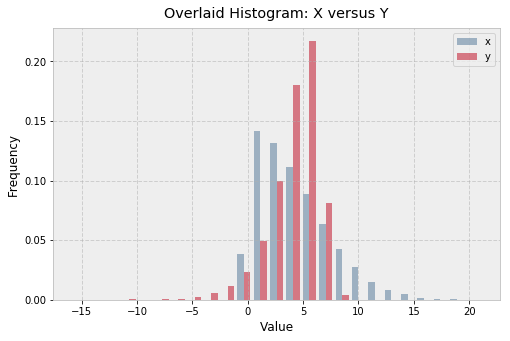

In [2]:
plt.hist([x, y], bins=25, alpha=0.5, label=['x', 'y'], density=True)
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Overlaid Histogram: X versus Y');

### Quadratic model

In [3]:
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import OLS

xquad = add_constant(np.stack((x, x**2), axis=1))

model = OLS(endog=y, exog=xquad).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 7.820e+04
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:00:43   Log-Likelihood:                -57391.
No. Observations:               40000   AIC:                         1.148e+05
Df Residuals:                   39997   BIC:                         1.148e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3887      0.012     33.737      0.0

In [4]:
print(model.summary(xname=['const', 'B1', 'B2'], title='Quadratic Model Summary'))

                           Quadratic Model Summary                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 7.820e+04
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:00:43   Log-Likelihood:                -57391.
No. Observations:               40000   AIC:                         1.148e+05
Df Residuals:                   39997   BIC:                         1.148e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3887      0.012     33.737      0.0

### Logarithmic model

In [5]:
xlog = add_constant(np.log(x))

model = OLS(endog=y, exog=xlog).fit()
print(model.summary(xname=['const', 'B1'], title='Logarithmic Model Summary'))

                          Logarithmic Model Summary                           
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 7.667e+05
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:00:43   Log-Likelihood:                -29135.
No. Observations:               40000   AIC:                         5.827e+04
Df Residuals:                   39998   BIC:                         5.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0014      0.003    573.492      0.0

In [6]:
df = pd.DataFrame({'true_coefficient': [b0, b1],
                   'model_coefficient': model.params}).round(3)

In [7]:
df

,model_coefficient,true_coefficient
0,2.001,2.0
1,2.000,2.0


# Challenge 2

<font color="blue">
Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)
</font>

In [8]:
b2 = 0.2

In [9]:
y2 = b0 + b1 * x + b2 * x**2 + np.random.randn(x.size)

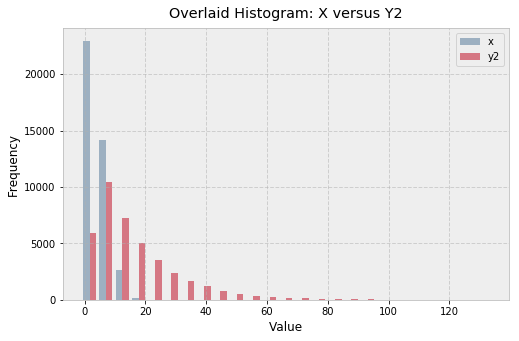

In [10]:
plt.hist([x, y2], bins=25, alpha=0.5, label=['x', 'y2'])
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Overlaid Histogram: X versus Y2');

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
xpoly = poly.fit_transform(x[:, None])
X_train, X_test, y_train, y_test = train_test_split(xpoly, y)

# Challenge 3

<font color="blue">
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot: training error; test error; R squared; AIC.
</font>

In [12]:
from collections import OrderedDict

from sklearn.metrics import mean_squared_error, r2_score

# I use statsmodels.OLS over sklearn.LinearRegression here
#     because the former comes prepackaged with an AIC
#     attribute.

def train_test_poly(deg, x, y, random_state=444):
    """Generate polynomial features and split into train/test."""
    poly = PolynomialFeatures(deg)
    if x.ndim == 1:
        x = x[:, None]
    xpoly = poly.fit_transform(x)
    return train_test_split(xpoly, y, random_state=random_state)

stats = []

degree = range(0, 8)
for deg in degree:
    X_train, X_test, y_train, y_test = train_test_poly(deg, x, y2)
    model = OLS(endog=y_train, exog=X_train).fit()
    train_err = mean_squared_error(y_train, model.predict(X_train))
    test_err = mean_squared_error(y_test, model.predict(X_test))
    od = OrderedDict([
        ('degree', deg),
        ('train_err', train_err),
        ('test_err', test_err),
        ('test_r2', r2_score(y_test, model.predict(X_test))),
        ('aic', model.aic)
        ])
    stats.append(od)
    
stats = pd.DataFrame(stats).set_index('degree')

Our ground truth function here is a second-degree polynomial.  Therefore, we wouldn't expect any explanatory power to be added after fitting polynomial models above this degree.  And that seems to be the case:

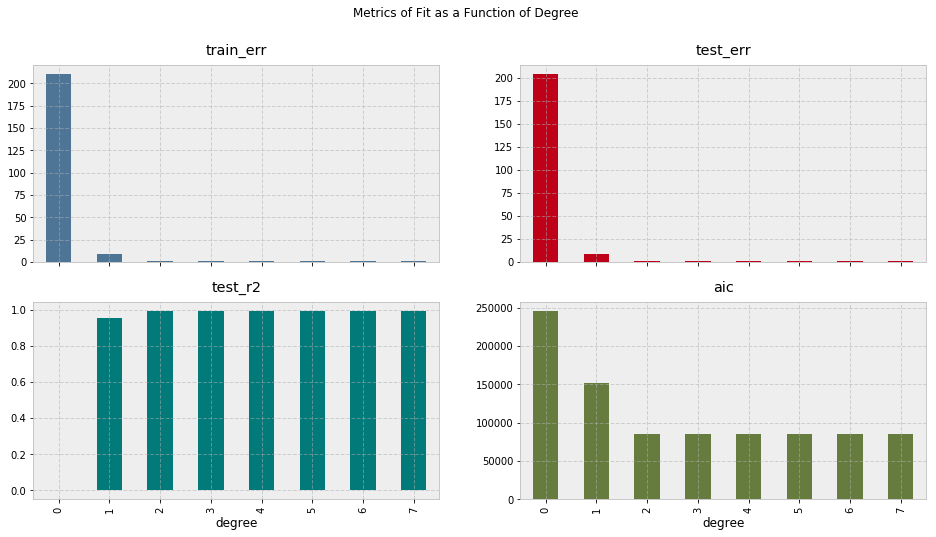

In [13]:
stats.plot.bar(subplots=True, layout=(2,2), figsize=(16,8),
               title='Metrics of Fit as a Function of Degree',
               legend=False);

# Challenge 4

<font color='blue'> For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve. </font>

From Problem 2 we have:

$$y_2 = 2 + 2x +  0.2x^2 + \varepsilon$$

Where $\varepsilon$, the noise term, is ~$N(0,1)$.  This noise term is fairly small.  Let's make it a bit bigger so that our learning curve "starts out small" and the effect is more pronounced:

In [14]:
y3 = y2 + np.random.normal(loc=5, scale=15, size=y2.size)
X_train, X_test, y_train, y_test = train_test_split(xpoly, y3, random_state=444)

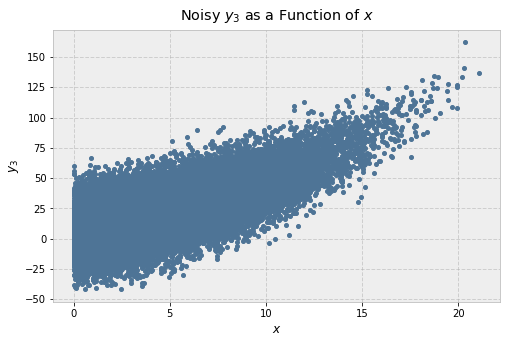

In [15]:
plt.plot(x, y3, linestyle='')
plt.ylabel(r'$y_3$')
plt.xlabel(r'$x$')
plt.title(r'Noisy $y_3$ as a Function of $x$');

In [16]:
from sklearn.linear_model import LinearRegression

errs = []
steps = range(5, X_train.shape[0] + 5, 5)
for step in steps:
    model = LinearRegression(n_jobs=-1).fit(X=X_train[:step], y=y_train[:step])
    train_err = mean_squared_error(y_train[:step], model.predict(X_train[:step]))
    test_err = mean_squared_error(y_test, model.predict(X_test))
    od = OrderedDict([('train_err', train_err), ('test_err', test_err)])
    errs.append(od)
errs = pd.DataFrame(errs, index=steps)

The learning curve appears to be very steep in this case:

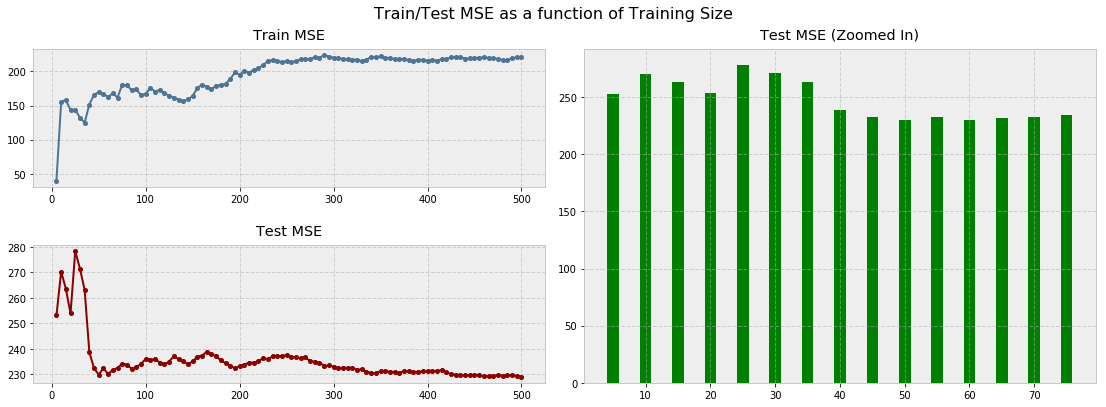

In [17]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(16, 6))
gs = GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(errs['train_err'].iloc[:100])
ax1.set_title('Train MSE')
ax2 = plt.subplot(gs[1, 0])
ax2.plot(errs['test_err'].iloc[:100], color='darkred')
ax2.set_title('Test MSE')
ax3 = plt.subplot(gs[:, 1])
ax3.bar(errs.index[:15], errs['test_err'].iloc[:15], color='green', width=1.8)
ax3.set_title('Test MSE (Zoomed In)')
fig.suptitle('Train/Test MSE as a function of Training Size', fontsize=16)
plt.tight_layout(pad=3, w_pad=1, h_pad=2)